In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20201118_generator,
    explored_models_20201114_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_source_analysis

In [2]:
import pandas as pd

In [3]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114+20201118_separatebn', 'source_analysis.pkl.debug')
if not exists(f_main_result):
    makedirs(dirname(f_main_result), exist_ok=True)
    df_main_result = collect_rcnn_k_bl_source_analysis(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
                        'multi_path': True,
            'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201114_generator(with_source=True, separate_bn_list=[True]),
            explored_models_20201118_generator(with_source=True, separate_bn_list=[True]),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        no_missing_data=False,
        key_override={'model_prefix': 'maskcnn_polished_with_rcnn_k_bl.multipath'},
        debug=True,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [4]:
df_main_result

num_param  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu   False                mse       0          2         32          5           cm-avg       1280            41453   
                                                                                                2560            41453   
                                                                                                5120            41453   

                                                                                                                                              source_analysis  
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu   False                mse       0          2         32          5           cm-avg       1280        {('I', 'B1'): 0.5978652142715343, ('I', 'B1', ...  
                                                                                                2560        {('I', 'B1'): 1.001052819913096, ('I', 'B1', '...  
                                                                                                5120        {('I', 'B1'): 1.5224740328346027, ('I', 'B1', ...

In [5]:
df_main_result = df_main_result.dropna()

In [6]:
df_main_result

num_param  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu   False                mse       0          2         32          5           cm-avg       1280            41453   
                                                                                                2560            41453   
                                                                                                5120            41453   

                                                                                                                                              source_analysis  
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu   False                mse       0          2         32          5           cm-avg       1280        {('I', 'B1'): 0.5978652142715343, ('I', 'B1', ...  
                                                                                                2560        {('I', 'B1'): 1.001052819913096, ('I', 'B1', '...  
                                                                                                5120        {('I', 'B1'): 1.5224740328346027, ('I', 'B1', ...

In [7]:
# compare with previous result.
f_main_result_prev = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result_prev = pd.read_pickle(f_main_result_prev)

In [8]:
def remove_high_cls(df_this):
    df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls') <= 7]
    return df_this.sort_index()

df_main_result = remove_high_cls(df_main_result)
df_main_result_prev = remove_high_cls(df_main_result_prev)

In [9]:
# check their corrsponding ones, and compute vector similarity

In [10]:
import numpy as np

In [11]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        assert len(key) >= 2 and len(key) <= 9
        ret[len(key)-2] += v  # -2 because minimal length of key is 2 (I + one Conv)
    ret = ret/ret.sum()
    return ret

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))
# del df_main_result['source_analysis']

In [12]:
def get_vec_2(x, y):
    # key has order, actually.
    assert x.keys() == y.keys()
    print(x.keys())
    # sort by length, basically
    key_sum_x = sum(x.values())
    key_sum_y = sum(y.values())
    return (
        [z[1]/key_sum_x for z in sorted(x.items(), key = lambda xx: xx[0])],
        [z[1]/key_sum_y for z in sorted(y.items(), key = lambda xx: xx[0])]
    )

In [13]:
df_main_result

num_param  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu   False                mse       0          2         32          5           cm-avg       1280            41453   
                                                                                                2560            41453   
                                                                                                5120            41453   

                                                                                                                                              source_analysis  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu   False                mse       0          2         32          5           cm-avg       1280        {('I', 'B1'): 0.5978652142715343, ('I', 'B1', ...   
                                                                                                2560        {('I', 'B1'): 1.001052819913096, ('I', 'B1', '...   
                                                                                                5120        {('I', 'B1'): 1.5224740328346027, ('I', 'B1', ...   

                                                                                                                                          source_analysis_vec  
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu   False                mse       0          2         32          5           cm-avg       1280        [0.7843163972690782, 0.17336046246137685, 0.03...  
                                                                                                2560        [0.6969862506116561, 0.22275882741268727, 0.06...  
                                                                                                5120        [0.6247201957470895, 0.24964344410207653, 0.09...

In [14]:
df_main_result_prev['source_analysis_vec'] = df_main_result_prev['source_analysis'].map(lambda x: get_normalized_vec(x))
# del df_main_result_prev['source_analysis']

In [15]:
df_main_result_merged = df_main_result.join(df_main_result_prev,how='inner',lsuffix='new',rsuffix='old')

In [16]:
# ok. time to compute 

from scipy.spatial import distance

In [17]:
df_main_result_merged

num_paramnew  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                 
relu   False                mse       0          2         32          5           cm-avg       1280               41453   
                                                                                                2560               41453   
                                                                                                5120               41453   

                                                                                                                                           source_analysisnew  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu   False                mse       0          2         32          5           cm-avg       1280        {('I', 'B1'): 0.5978652142715343, ('I', 'B1', ...   
                                                                                                2560        {('I', 'B1'): 1.001052819913096, ('I', 'B1', '...   
                                                                                                5120        {('I', 'B1'): 1.5224740328346027, ('I', 'B1', ...   

                                                                                                                                       source_analysis_vecnew  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu   False                mse       0          2         32          5           cm-avg       1280        [0.7843163972690782, 0.17336046246137685, 0.03...   
                                                                                                2560        [0.6969862506116561, 0.22275882741268727, 0.06...   
                                                                                                5120        [0.6247201957470895, 0.24964344410207653, 0.09...   

                                                                                                            num_paramold  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                 
relu   False                mse       0          2         32          5           cm-avg       1280               39533   
                                                                                                2560               39533   
                                                                                                5120               39533   

                                                                                                                                           source_analysisold  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu   False                mse       0          2         32          5           cm-avg       1280        {('I', 'B1'): 0.724429486767325, ('I', 'B1', '...   
                                                                                                2560        {('I', 'B1'): 0.9138246366179447, ('I', 'B1', ...   
                                                                                                5120        {('I', 'B1'): 1.3135992697525827, ('I', 'B1', ...   

                                                                                                                                       source_analysis_vecold  
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu   False                mse       0          2         32          5           cm-avg       1280        [0.5330389884218669,

In [18]:
def get_normalized_vec_2(x, y):
    assert x.keys() == y.keys()
    x = get_normalized_vec(x)
    y = get_normalized_vec(y)
    return x, y 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
def compare_depth_distribution(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        print(train_keep)
        df_this_size = df_this.xs(train_keep, level='train_keep')
        assert df_this_size.shape[0] == 1
        plt.close('all')
        fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=True, sharey=True, sharex=True)
        vecs = [
            get_normalized_vec_2(x, y) for x, y in zip(
            df_this_size['source_analysisold'].values,
            df_this_size['source_analysisnew'].values
        )]
        assert len(vecs) == 1
        axes[0].bar(np.arange(8), vecs[0][0])
        axes[0].set_title('old')
        axes[1].bar(np.arange(8), vecs[0][1])
        axes[1].set_title('new')
        plt.show()
        
        plt.close('all')
        fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=True, sharey=True, sharex=True)
        vecs = [
            get_vec_2(x, y) for x, y in zip(
            df_this_size['source_analysisold'].values,
            df_this_size['source_analysisnew'].values
        )]
        assert len(vecs) == 1
        axes[0].bar(np.arange(len(vecs[0][0])), vecs[0][0])
        axes[0].set_title('old')
        axes[1].bar(np.arange(len(vecs[0][0])), vecs[0][1])
        axes[1].set_title('new')
        plt.show()

1280


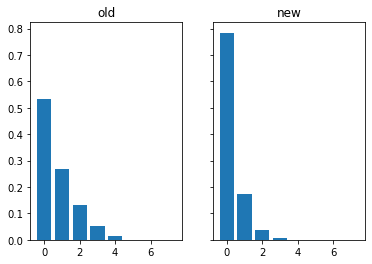

dict_keys([('I', 'B1'), ('I', 'B1', 'R1'), ('I', 'B1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1', 'R1')])


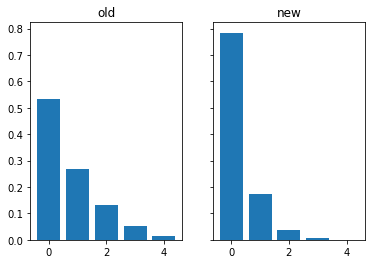

2560


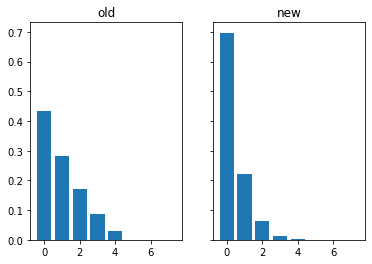

dict_keys([('I', 'B1'), ('I', 'B1', 'R1'), ('I', 'B1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1', 'R1')])


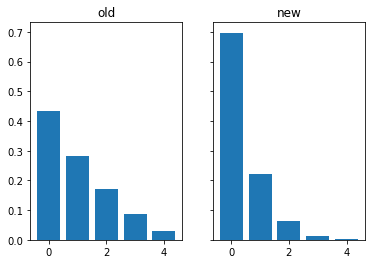

5120


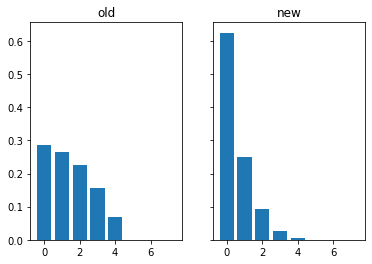

dict_keys([('I', 'B1'), ('I', 'B1', 'R1'), ('I', 'B1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1'), ('I', 'B1', 'R1', 'R1', 'R1', 'R1')])


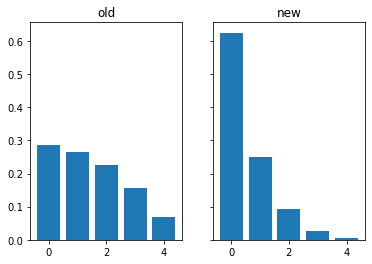

In [20]:
compare_depth_distribution(df_main_result_merged)
# more difference with larger train keep.
# which is understandable, because more training data leads to more distributed depth, and thus cosine distances will be more spread out.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
def compare_depth_diff(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        print(train_keep)
        df_this_size = df_this.xs(train_keep, level='train_keep')
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        aaa = df_this_size['source_analysis_vecnew'].map(lambda x: x[0])
        bbb = df_this_size['source_analysis_vecold'].map(lambda x: x[0])
        ax.scatter(aaa.values, bbb.values)
        ax.plot([0,1],[0,1],linestyle='--')
        plt.show()

1280


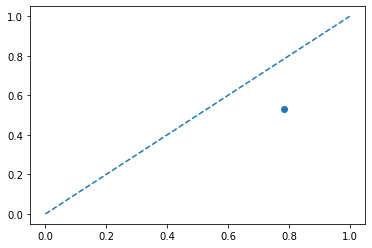

2560


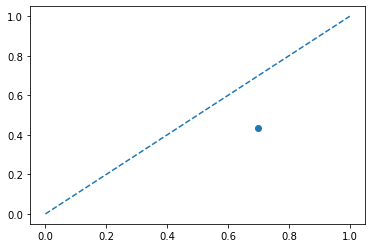

5120


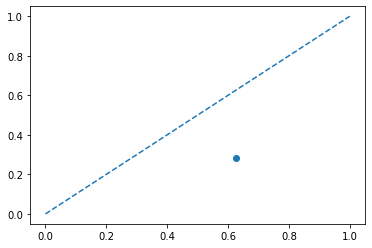

In [22]:
compare_depth_diff(df_main_result_merged)

In [23]:
# raw source analysis list from this file and `20200725+20200801+20200801_2_source_analysis_debug` are the same
def check_source_analysis_list():
    a = [{'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 1.0, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.5, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.5, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 0.5, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,4', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,3', 's1,4', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 's1,4', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 's1,4', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,4', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,3', 's1,4', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 's1,4', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 's1,4', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,5', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,4', 's1,5', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,3', 's1,4', 's1,5', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,2', 's1,3', 's1,4', 's1,5', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1', 's1,2', 's1,3', 's1,4', 's1,5', 0.2, 0.2)}]
    b = [{'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 1.0, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.5, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.5, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1,1', 's1,2,1', 0.5, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1,1', 's1,2,1', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2,2', 's1,3,1', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1,2', 's1,2,3', 's1,3,2', 0.3333333333333333, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1,1', 's1,2,1', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2,2', 's1,3,1', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1,2', 's1,2,3', 's1,3,2', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,4', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,3,3', 's1,4,1', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,2,4', 's1,3,4', 's1,4,2', 0.25, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1,3', 's1,2,5', 's1,3,5', 's1,4,3', 0.25, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,1', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,2', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,1,1', 's1,2,1', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,3', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,2,2', 's1,3,1', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,1,2', 's1,2,3', 's1,3,2', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,4', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,3,3', 's1,4,1', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,2,4', 's1,3,4', 's1,4,2', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1,3', 's1,2,5', 's1,3,5', 's1,4,3', 0.2, 0.2)}, {'conv': ('I', 'B1'), 'scale': (1.0, 's1,5', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1'), 'scale': (1.0, 's1,4,4', 's1,5,1', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1'), 'scale': (1.0, 's1,3,6', 's1,4,5', 's1,5,2', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,2,6', 's1,3,7', 's1,4,6', 's1,5,3', 0.2, 0.2)}, {'conv': ('I', 'B1', 'R1', 'R1', 'R1', 'R1'), 'scale': (1.0, 's1,1,4', 's1,2,7', 's1,3,8', 's1,4,7', 's1,5,4', 0.2, 0.2)}]
    assert len(a) == len(b)
    for x, y in zip(a,b):
        assert x.keys() == y.keys()
        assert x['conv'] == y['conv']
        scaley = tuple([z[:4] if type(z) is str else z for z in y['scale']])
    #     print(scaley, x['scale'])
        assert scaley == x['scale']
        
check_source_analysis_list()